In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf

import sys
sys.path.append('src/')
from get_shufflenet import get_shufflenet
from training_utils import train

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data_dir = '/home/ubuntu/data/tiny-imagenet-200/'

# Train

In [4]:
graph, ops = get_shufflenet(
    initial_learning_rate=1e-1, groups=3, weight_decay=4e-3
)

In [5]:
losses, is_early_stopped = train(
    0, graph, ops, 
    data_dir + 'train.tfrecords', data_dir + 'val.tfrecords',
    batch_size=200, num_epochs=30, steps_per_epoch=500, validation_steps=50, 
    lr_patience=4, lr_threshold=0.01, patience=10, threshold=0.01
)

1  4.605 3.906 0.083 0.141  232.475
2  3.842 3.744 0.152 0.171  228.916
3  3.660 3.496 0.182 0.208  228.860
4  3.563 3.390 0.196 0.224  228.773
5  3.513 3.361 0.206 0.230  228.759
6  3.480 3.314 0.211 0.243  228.801
7  3.455 3.442 0.215 0.222  228.767
8  3.443 3.296 0.219 0.250  228.883
9  3.429 3.370 0.221 0.240  228.809
10  3.421 3.423 0.222 0.222  228.826
learning rate is divided by 10
11  2.814 2.608 0.333 0.384  228.874
12  2.550 2.509 0.386 0.400  228.900
13  2.452 2.437 0.410 0.412  228.852
14  2.404 2.420 0.418 0.422  228.846
15  2.355 2.394 0.429 0.425  228.773
16  2.316 2.385 0.436 0.425  228.783
17  2.274 2.384 0.446 0.427  228.801
18  2.236 2.362 0.452 0.429  228.813
19  2.209 2.329 0.459 0.438  228.799
20  2.174 2.298 0.467 0.442  228.806
21  2.156 2.312 0.470 0.442  228.873
22  2.122 2.276 0.477 0.451  228.797
23  2.105 2.299 0.482 0.446  228.760
24  2.089 2.265 0.484 0.450  228.858
25  2.067 2.242 0.489 0.458  229.045
26  2.058 2.257 0.492 0.456  229.001
27  2.042 2.216 

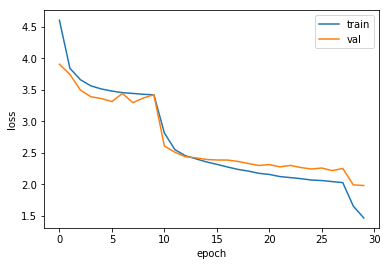

In [6]:
plt.plot([x[1] for x in losses], label='train');
plt.plot([x[2] for x in losses], label='val');
plt.legend();
plt.xlabel('epoch');
plt.ylabel('loss');

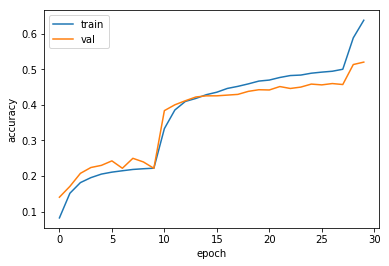

In [7]:
plt.plot([x[3] for x in losses], label='train');
plt.plot([x[4] for x in losses], label='val');
plt.legend();
plt.xlabel('epoch');
plt.ylabel('accuracy');